# Lead Scoring case study

## Problem Statement :
X Education, an online education company, sells courses to industry professionals through its website and various marketing channels. The company generates leads when individuals express interest by browsing courses, filling out forms, or watching videos. Leads are also acquired through past referrals. Despite receiving numerous leads, the lead conversion rate is low at around 30%. To enhance efficiency, X Education aims to identify and prioritize "Hot Leads," those with the highest potential for conversion. By focusing the sales team's efforts on these high-potential leads, the company anticipates an increase in the overall lead conversion rate.

In [152]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#supress warnings
import warnings
warnings.filterwarnings("ignore")

# Sklearn libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

#statmodel libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

## Reading the data

In [153]:
# Reading the csv file in dataframe
df_leads = pd.read_csv("Leads.csv")

In [154]:
# display the dataframe
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [155]:
# get numbe of rows and columns of the dataframe
df_leads.shape

(9240, 37)

#### Data has 9240 rows and 37 columns

### Data Understanding and Inspection

In [156]:
# Check summary of all numerical columns to understand the dataset better in terms of spread and 
# also spot anything unusual

df_leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [157]:
# checking number of unique values in each column
df_leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [158]:
# Check data types of columns and nulls
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### There are null values in the dataframe

### Handling missing values

In [159]:
#Checking for count of missing values in each column
df_leads.isnull().sum()/len(df_leads) * 100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [160]:
# inspecting nulls in 'country' column
df_leads['Country'].value_counts()/len(df_leads) * 100

India                   70.259740
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Hong Kong                0.075758
Bahrain                  0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
South Africa             0.043290
Nigeria                  0.043290
Germany                  0.043290
Kuwait                   0.043290
Canada                   0.043290
Sweden                   0.032468
China                    0.021645
Asia/Pacific Region      0.021645
Uganda                   0.021645
Bangladesh               0.021645
Italy                    0.021645
Belgium                  0.021645
Netherlands              0.021645
Ghana                    0.021645
Philippines              0.021645
Russia                   0.010823
Switzerland   

In [161]:
# inspecting nulls in 'Specialization' column
df_leads['Specialization'].value_counts()/len(df_leads) * 100

Select                               21.017316
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [162]:
# Getting the column names having 'Select' as one of its values
cols_with_select_value = [col for col in df_leads.columns if len(df_leads[col].isin(['Select']).unique())>1]
print(cols_with_select_value)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


In [163]:
# Replacing the value 'Select' with null 
# Converting 'Select' values to NaN.
df_leads = df_leads.replace('Select', np.nan)

In [164]:
# Checking if all 'Select' values have been handled in the columns
cols_with_select_value = [col for col in df_leads.columns if len(df_leads[col].isin(['Select']).unique())>1]
print(cols_with_select_value)

[]


In [165]:
# Checking for null percentage again to observe the changes applied
df_leads.isnull().sum()/len(df_leads) * 100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [166]:
# sorting missing values 
100*(df_leads.isnull().sum()/len(df_leads)).sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

### Dropping the columns that has null percentage > 40%

In [167]:
# user defined function to drop columns and know the shape before and after dropping(did not want to lose city and specialzation)

def dropNullColumns(data ,percentage=40):
    
    missing_perc = 100*(data.isna().mean()).sort_values(ascending=False)
    col_to_drop = missing_perc[missing_perc>=percentage].index.to_list()
    print("Total columns dropped: ",len(col_to_drop),"\n")
    print("List of columns dropped : " , col_to_drop,"\n")
    print("Shape before dropping columns: ",data.shape)
    
    data.drop(labels=col_to_drop,axis=1, inplace=True)
    
    print("Shape after dropping columns: ",data.shape)

In [168]:
# dropping columns using UDF
dropNullColumns(df_leads) 

Total columns dropped:  7 

List of columns dropped :  ['How did you hear about X Education', 'Lead Profile', 'Lead Quality', 'Asymmetrique Profile Score', 'Asymmetrique Activity Score', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index'] 

Shape before dropping columns:  (9240, 37)
Shape after dropping columns:  (9240, 30)


In [169]:
# check the null percentage 

100*(df_leads.isnull().sum()/len(df_leads)).sort_values(ascending=False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.0000

#### Columns with Null percentage > 40% have been removed

#### Analyzing the data and handle the missing values for Categorical columns

In [170]:
# Select the columns with non-numeric data type
categorical_cols = df_leads.select_dtypes(include=['category', 'object']).columns.tolist()

# Print the selected columns
print(categorical_cols)

['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


In [171]:
# let's understand the values present in few categoical columns
columnsList= ["City","Specialization","Tags",'What matters most to you in choosing a course',
              'What is your current occupation','Country','Last Activity','Lead Source']


for i in columnsList:
        perc=100*df_leads[i].value_counts(normalize=True)
        print("value_counts % for :",i,"\n")
        print(perc,"\n")
        print("*"*40,"\n")

value_counts % for : City 

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64 

**************************************** 

value_counts % for : Specialization 

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COM

##### Columns to be dropped 
1. Country needs to be dropped as 95.7% of the customers are Indians and it does not impact the model
2. What matters most to you in choosing a course needs to be dropped as 99.9% customers are preferring for 'Better Career Prospects '
3. City needs to be dropped as most of the customers are from 'Mumbai' and null percentage is nearly 40% which makes the data more skewed.
4. Tags can be dropped

In [172]:
# Dropping the columns
df_leads.drop(['City','Tags','Country','What matters most to you in choosing a course'],axis=1,inplace=True)
print("After Drop",df_leads.shape)

After Drop (9240, 26)


In [173]:
# Imputing values for rest of the columns

missing_values={'Specialization':'Others','Lead Source':'Google','Last Activity':'Email Opened',
               'What is your current occupation':'NA'}
df_leads=df_leads.fillna(value=missing_values)

#### Grouping the Values

In [174]:
# Grouping low frequency value levels to Others
df_leads['Lead Source'] = df_leads['Lead Source'].replace(["bing","Click2call","Press_Release",
                                                           "Social Media","Live Chat","youtubechannel",
                                                           "testone","Pay per Click Ads","welearnblog_Home",
                                                           "WeLearn","blog","NC_EDM"],"Others")

# Changing google to Google
df_leads['Lead Source'] = df_leads['Lead Source'].replace("google","Google")

In [175]:
# Grouping low frequency value levels to Others 
df_leads['Last Activity'] = df_leads['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                               'Had a Phone Conversation', 
                                                               'Approached upfront',
                                                               'View in browser link Clicked',       
                                                               'Email Marked Spam',                  
                                                               'Email Received','Visited Booth in Tradeshow',
                                                               'Resubscribed to emails'],'Others')

In [176]:
# Renaming column name to "Free_copy" from "A free copy of Mastering The Interview"
df_leads.rename(columns={'A free copy of Mastering The Interview': 'Free_copy'}, inplace=True)

# Renaming column name to "Current_occupation" from "What is your current occupationA free copy of Mastering The Interview"
df_leads.rename(columns={'What is your current occupation': 'Current_occupation'}, inplace=True)


In [177]:
# Mapping binary categorical variables (Yes/No to 1/0) 
df_leads['Do Not Email'] = df_leads['Do Not Email'].apply(lambda x: 1 if x =='Yes' else 0)

df_leads['Free_copy'] = df_leads['Free_copy'].apply(lambda x: 1 if x =='Yes' else 0)

In [178]:
# Re Checking the percentage of null values for remaining columns

round(((df_leads.isnull().sum()/df_leads.shape[0])*100),2).sort_values(ascending=False)


TotalVisits                                 1.48
Page Views Per Visit                        1.48
Prospect ID                                 0.00
Magazine                                    0.00
Free_copy                                   0.00
I agree to pay the amount through cheque    0.00
Get updates on DM Content                   0.00
Update me on Supply Chain Content           0.00
Receive More Updates About Our Courses      0.00
Through Recommendations                     0.00
Digital Advertisement                       0.00
Newspaper                                   0.00
X Education Forums                          0.00
Newspaper Article                           0.00
Search                                      0.00
Lead Number                                 0.00
Current_occupation                          0.00
Specialization                              0.00
Last Activity                               0.00
Total Time Spent on Website                 0.00
Converted           

In [179]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9240 non-null   object 
 1   Lead Number                               9240 non-null   int64  
 2   Lead Origin                               9240 non-null   object 
 3   Lead Source                               9240 non-null   object 
 4   Do Not Email                              9240 non-null   int64  
 5   Do Not Call                               9240 non-null   object 
 6   Converted                                 9240 non-null   int64  
 7   TotalVisits                               9103 non-null   float64
 8   Total Time Spent on Website               9240 non-null   int64  
 9   Page Views Per Visit                      9103 non-null   float64
 10  Last Activity                       

#### Analyzing the data and handle the missing values for Numerical columns

In [180]:
df_leads.TotalVisits.value_counts().head(10)

0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: TotalVisits, dtype: int64

#### Missing values in 'TotalVisits' can be imputed with mode.

In [181]:
# TotalVisits missing values to be imputed with mode
df_leads['TotalVisits'].fillna(df_leads['TotalVisits'].mode()[0], inplace=True)

In [182]:
# Page Views Per Visit
df_leads['Page Views Per Visit'].value_counts().head(10)

0.0    2189
2.0    1795
3.0    1196
4.0     896
1.0     651
5.0     517
1.5     306
6.0     244
2.5     241
7.0     133
Name: Page Views Per Visit, dtype: int64

#### Missing values in 'Page Views Per Visit' can be imputed with mode.

In [183]:
# Page Views Per Visit missing values to be imputed with mode

df_leads['Page Views Per Visit'].fillna(df_leads['Page Views Per Visit'].mode()[0], inplace=True)

In [184]:
# Re Checking the percentage of null values after handling categorical and numerical columns

round(((df_leads.isnull().sum()/df_leads.shape[0])*100),2).sort_values(ascending=False)

Prospect ID                                 0.0
Lead Number                                 0.0
Free_copy                                   0.0
I agree to pay the amount through cheque    0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
Current_occupation                          0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                                 0.0
Converted                               

### Handling columns with only one unique value

In [185]:
#check for columns with one unique value, count and freq is same

df_leads.describe(include = 'object')

,Prospect ID,Lead Origin,Lead Source,Do Not Call,Last Activity,Specialization,Current_occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,Last Notable Activity
count,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240
unique,9240,5,9,2,9,19,7,2,1,2,2,2,2,2,1,1,1,1,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,Landing Page Submission,Google,No,Email Opened,Others,Unemployed,No,No,No,No,No,No,No,No,No,No,No,Modified
freq,1,4886,2909,9238,3540,3380,5600,9226,9240,9238,9239,9239,9236,9233,9240,9240,9240,9240,3407


#### Dropping the below mentioned columns as they contain only one unique value and it does not help in model building

In [186]:
# List of columns with one unique value whose count and frequency are same, we will drop these columns
cols_to_drop = ['Magazine','Receive More Updates About Our Courses',
                    'Update me on Supply Chain Content',
                    'Get updates on DM Content',
                    'I agree to pay the amount through cheque']

df_leads.drop(cols_to_drop, axis = 1, inplace = True)
print("After Dropping Columns",df_leads.shape)

After Dropping Columns (9240, 21)


### Dropping the columns which are not useful for model building

#### Columns such as:

'Prospect ID',
'Lead Number',
'Last Notable Activity'

In [187]:
# Dropping the columns
df_leads.drop(['Prospect ID','Lead Number','Last Notable Activity'],axis=1,inplace=True)

### Analysing Categorical columns

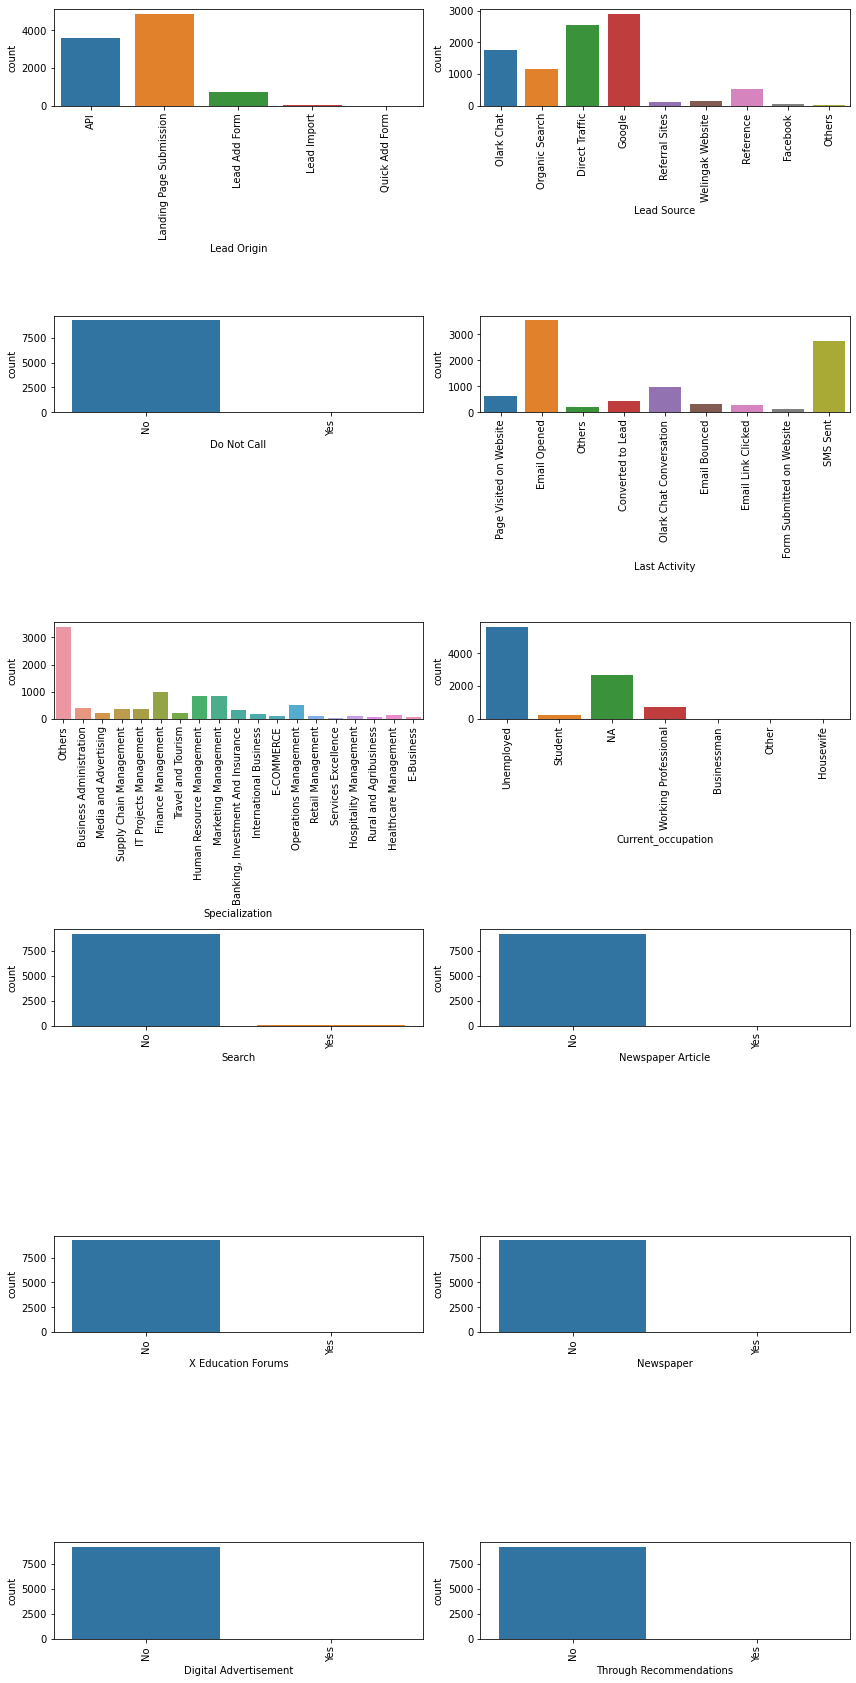

In [188]:
# plotting countplot for object dtype and histogram for number to get data distribution
categorical_col = df_leads.select_dtypes(include=['category', 'object']).columns.tolist()
plt.figure(figsize=(12,40))

for i in enumerate(categorical_col):
    plt.subplot(10,2, i[0]+1)
    ax=sns.countplot(x=i[1],data=df_leads) 
    plt.xticks(rotation=90)
    ax.set_xlabel(i[1])
    ax.set_ylabel('count')
    plt.tight_layout()
    
plt.show()

#### Following columns have data which is highly skewed :

- 1.'Do Not Call'
- 2.'Search'
- 3.'Newspaper Article'
- 4.'X Education Forums'
- 5.'Newspaper'
- 6.'Digital Advertisement
- 7.'Through Recommendations'

In [189]:
# Dropping categorical columns with highly skewed data

df_leads.drop(['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'],axis=1,inplace=True)
print("After Drop: ",df_leads.shape)

After Drop:  (9240, 11)


In [190]:
df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Current_occupation,Free_copy
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,0


### Values Standardization

#### Outlier Analysis

In [191]:
# creating definition for Outliers check
def Check_Outliers(data,columnList):

    plt.figure(figsize=[22,11])

    for i in enumerate(columnList):
        plt.subplot(2,2,i[0]+1)

        sns.boxplot(y=data[i[1]])     # y = df_leads[j] to make plot verticle

        plt.suptitle("\nChecking Outliers using Boxplot",fontsize=20,color="green")
        plt.ylabel(None)
        plt.title(i[1],fontsize=15,color='brown')

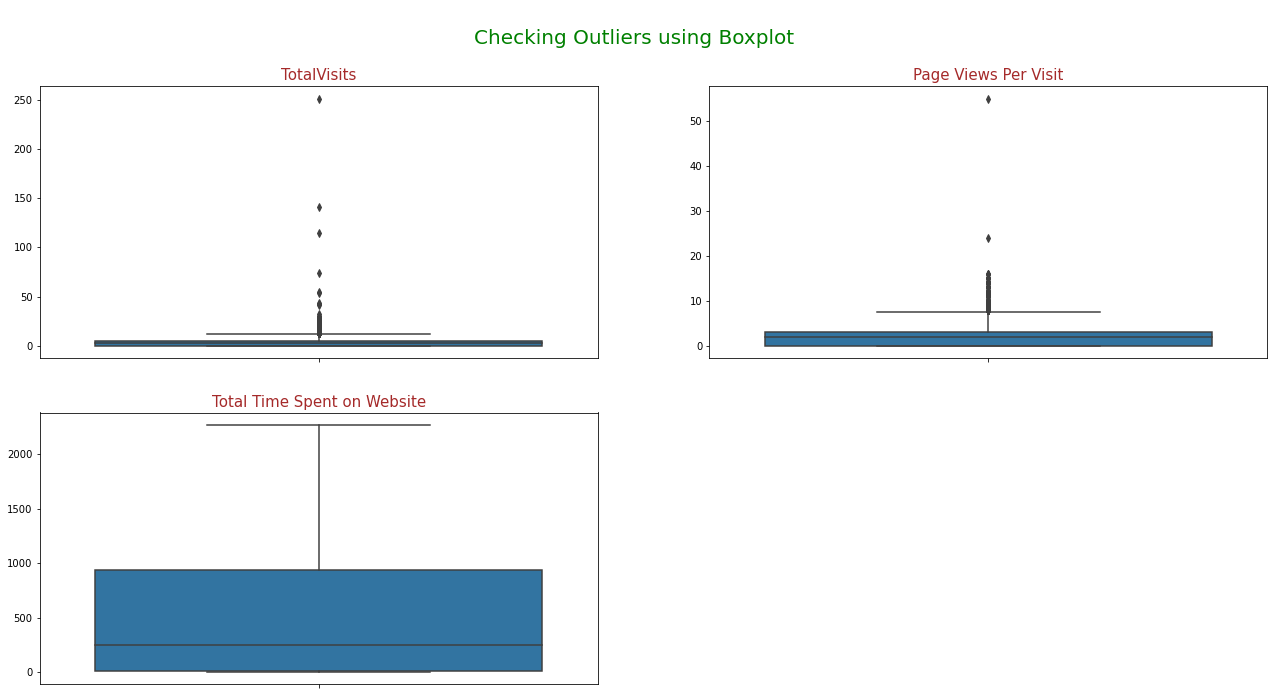

In [192]:
# Checking outliers for numerical variables other than target variable 
num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]

# UDF 
Check_Outliers(df_leads,num_cols)

##### 
Outliers for "TotalVisits","Page Views Per Visit" needs to be treated

#### Capping Outliers for the treatment

In [193]:
# before outlier treatment
df_leads.describe(percentiles=[.10,.25,.50,.75,.95])

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Free_copy
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.079437,0.385390,3.394156,487.698268,2.327787,0.312554
std,0.270435,0.486714,4.836682,548.021466,2.164258,0.463559
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000
50%,0.000000,0.000000,3.000000,248.000000,2.000000,0.000000
75%,0.000000,1.000000,5.000000,936.000000,3.000000,1.000000
95%,1.000000,1.000000,10.000000,1562.000000,6.000000,1.000000
max,1.000000,1.000000,251.000000,2272.000000,55.000000,1.000000


In [194]:
# Defining UDF to treat outliers via capping and flooring

def Outlier_treatment(df,columnList):
    for i in columnList:
        q1 = df[i].describe()["25%"]
        q3 = df[i].describe()["75%"]
        IQR = q3 - q1

        upper_bound = q3 + 1.5*IQR
        lower_bound = q1 - 1.5*IQR

        # capping upper_bound
        df[i] = np.where(df[i] > upper_bound, upper_bound,df[i])

        # flooring lower_bound
        df[i] = np.where(df[i] < lower_bound, lower_bound,df[i])

In [195]:
# Checking outliers for numerical variables other than target variable 
capping_cols = ["TotalVisits","Page Views Per Visit"]

# UDF 
Outlier_treatment(df_leads,capping_cols)

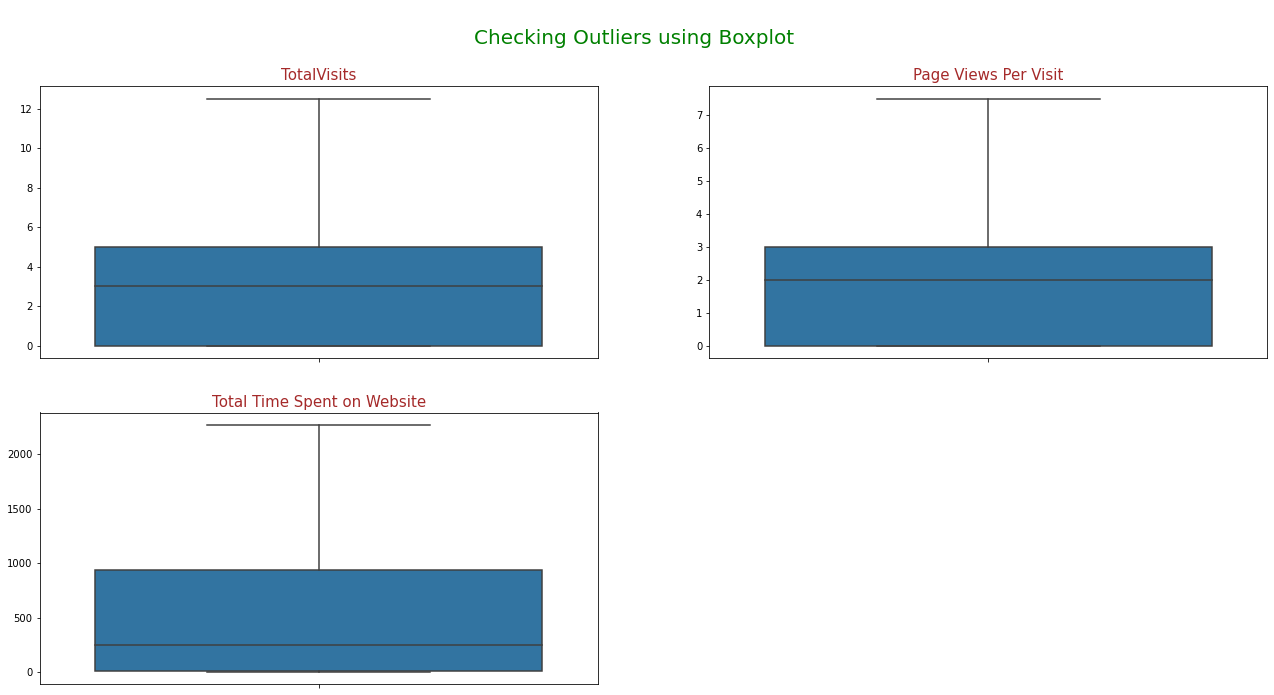

In [196]:
# Checking Boxplot after Outlier Treatment

num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]

# UDF for boxplot
Check_Outliers(df_leads,num_cols)

In [197]:
# after outlier treatment detailed percentile values
df_leads.describe(percentiles=[.10,.25,.50,.75,.95])

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Free_copy
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.079437,0.385390,3.213853,487.698268,2.274987,0.312554
std,0.270435,0.486714,3.005136,548.021466,1.917776,0.463559
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000
50%,0.000000,0.000000,3.000000,248.000000,2.000000,0.000000
75%,0.000000,1.000000,5.000000,936.000000,3.000000,1.000000
95%,1.000000,1.000000,10.000000,1562.000000,6.000000,1.000000
max,1.000000,1.000000,12.500000,2272.000000,7.500000,1.000000


### Data Analysis (EDA)

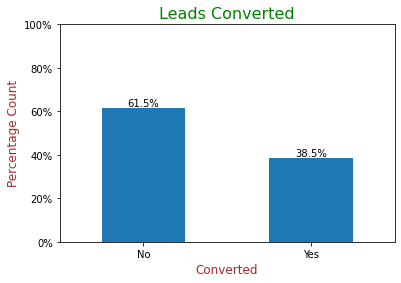

In [198]:
## ploting the results on bar plot

ax=(100*df_leads["Converted"].value_counts(normalize=True)).plot.bar()

# Adding and formatting title
plt.title("Leads Converted", fontdict={'fontsize': 16, 'fontweight' : 12, 'color' : 'Green'})


# Labeling Axes
plt.xlabel('Converted', fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Percentage Count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

# modification ticks y axis
ticks=np.arange(0,101,20)
labels=["{:.0f}%".format(i) for i in ticks] 
plt.yticks(ticks,labels)

#xticks
plt.xticks([0,1],["No","Yes"])
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    
plt.show()

#### Conversion rate is only 38.5%

### Univariate Analysis on Categorical Columns

In [199]:
#List of categorical columns
cat_cols = ["Lead Origin","Current_occupation","Do Not Email",
            "Free_copy","Lead Source","Last Activity","Specialization"]

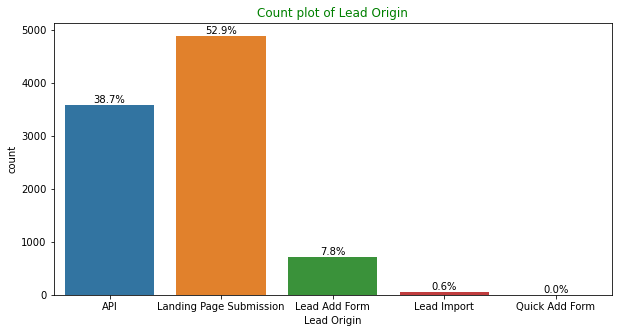

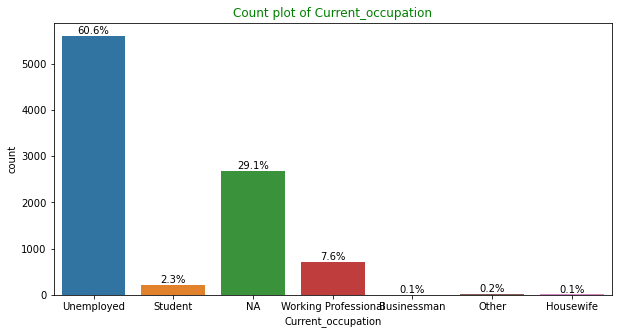

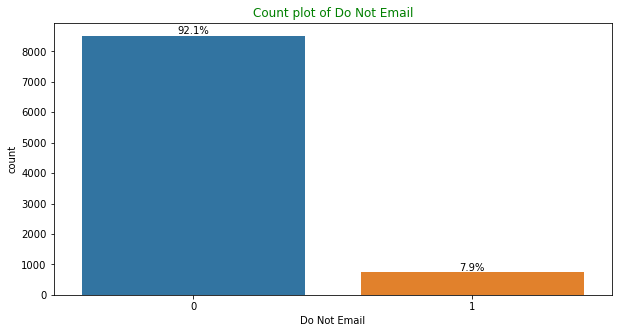

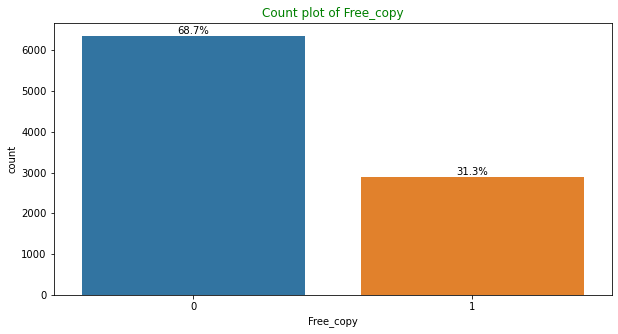

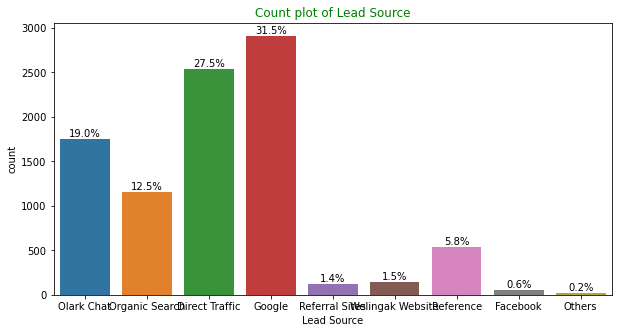

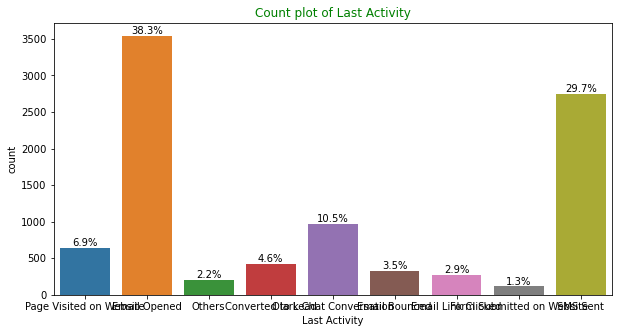

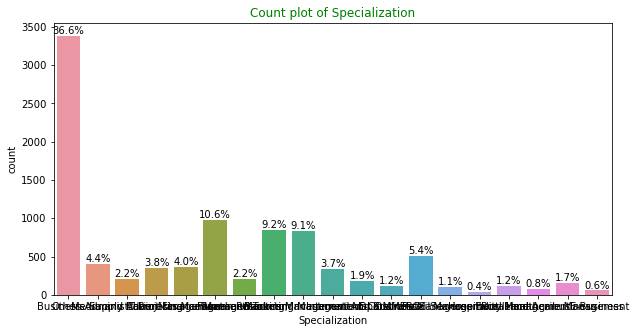

In [200]:
for i in cat_cols:
    
    plt.figure(figsize=[10,5])
    plt.title("Count plot of {}".format(i),color="green")
    ax=sns.countplot(x=i,data=df_leads)
    total=len(df_leads[i])
    plt.xticks(rotation=0)
    
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        
        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

#### Below are the insights
Lead Origin: "Landing Page Submission" identified 53% customers, "API" identified 39%.

Current_occupation: It has 90% of the customers as Unemployed

Do Not Email: 92% of the people has opted that they dont want to be emailed about the course.

Lead Source: 58% Lead source is from Google & Direct Traffic combined

Last Activity: 68% of customers contribution in SMS Sent & Email Opened activities

### Bivariate Analysis for Categorical Variables

In [201]:
# UDF "Bivariate_cat" tells comparision between Actual Distribution (value_count percentage) from the data and 
# 2nd graph tell the Lead Conversion Rate in percentage (how much leads are converted from 1st plot distribution)

def Bivariate_cat(df,variable_name,Target="Converted"):
    plt.figure(figsize=(10,6))
    sns.countplot(x = variable_name , hue = Target, data = df,palette='Set1')
    plt.xticks(rotation = 90)
    
    
    

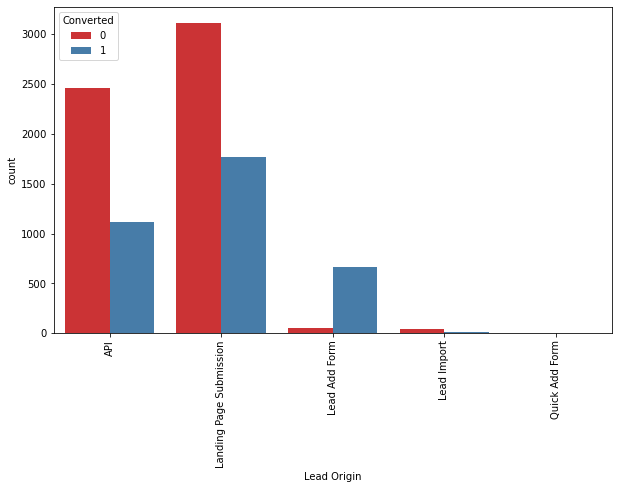

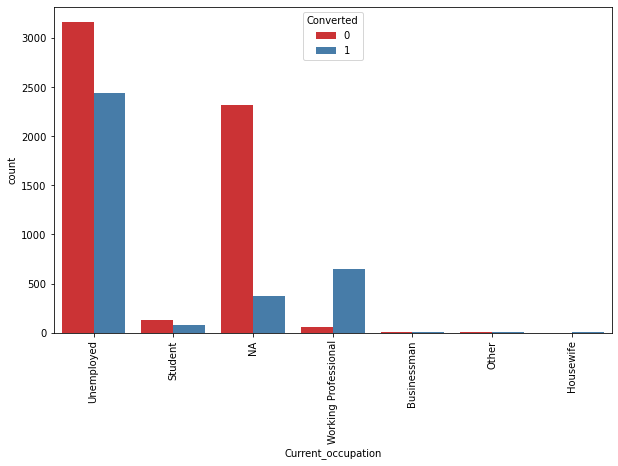

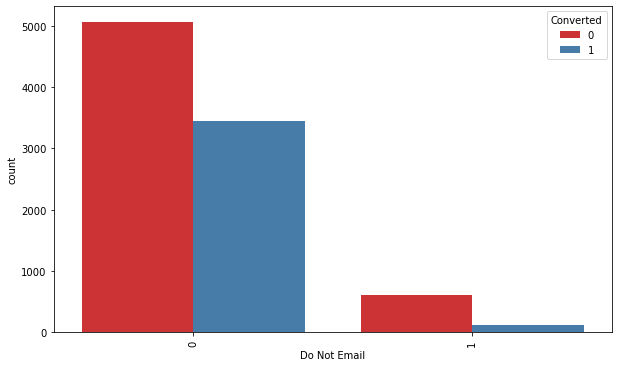

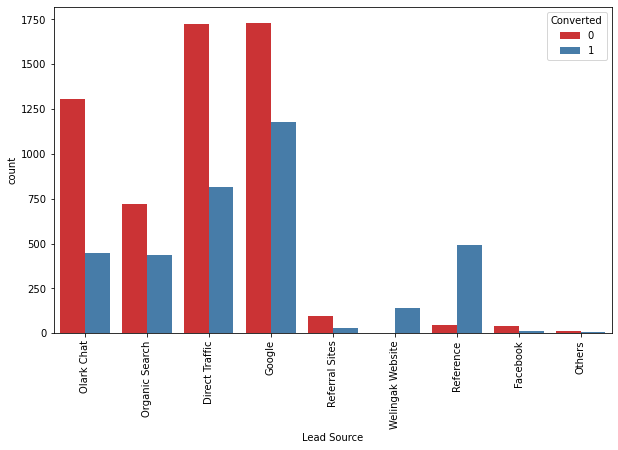

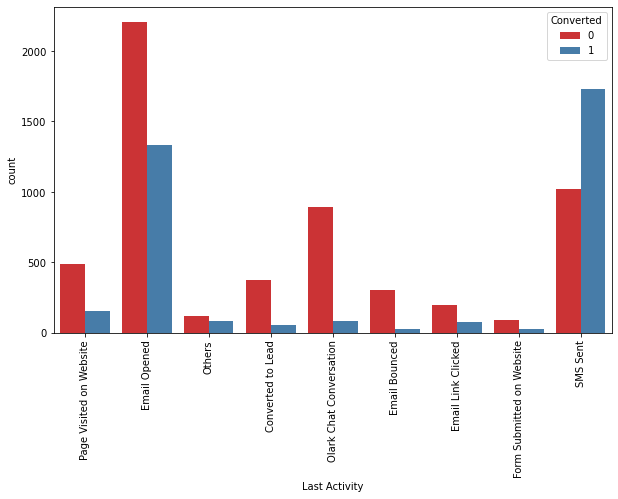

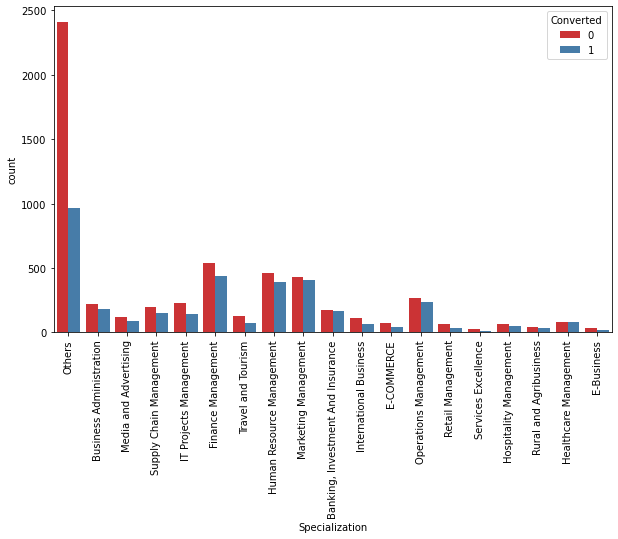

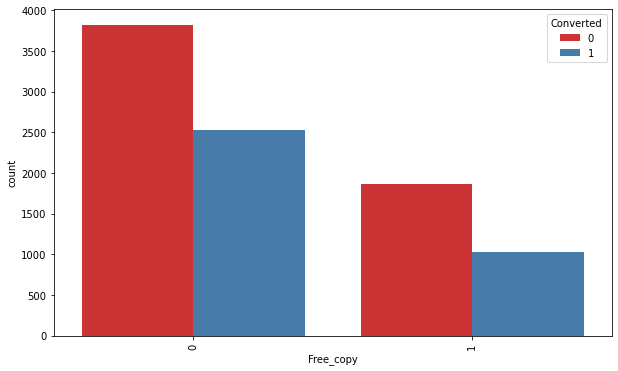

In [202]:
# Bivariate Analysis for all these variables using loop and UDF
# Comparision between variables w.r.t. 'Converted' (Target variable) , taking one categorical column w.r.t target variable as 'hue'
cat_cols = ["Lead Origin","Current_occupation","Do Not Email",
            "Lead Source","Last Activity","Specialization","Free_copy"]

for i in cat_cols:
    Bivariate_cat(df_leads,variable_name=i)

#### Below are the notable insights
Lead Origin: "Lead Add Form" has high conversion rate but "API" and "Landing Page Submission" has low conversion rate

Current_occupation: More "Unemployed" and "NA" are not converted and Working professionals are converted

Specialization: Marketing Managemt,HR Management,Finance Management shows good contribution in conversion.

### Bivariate Analysis on Numerical Variables

<Figure size 1152x288 with 0 Axes>

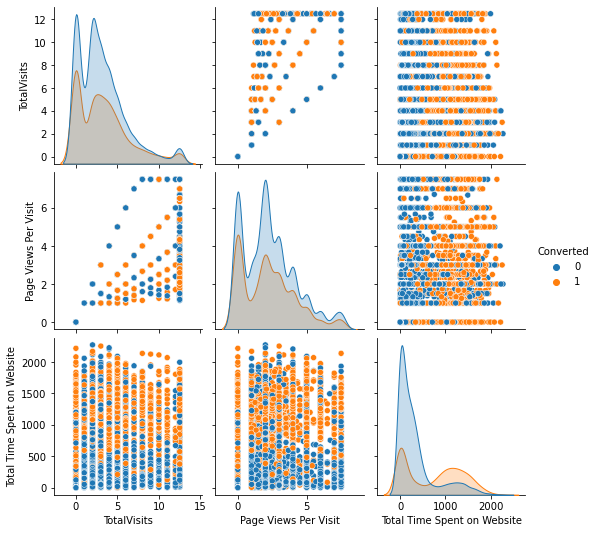

In [203]:
plt.figure(figsize=(16, 4))
sns.pairplot(data=df_leads,vars=num_cols,hue="Converted")                                  
plt.show()

In [204]:
# Numerical columns
num_cols =["Converted",'TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']

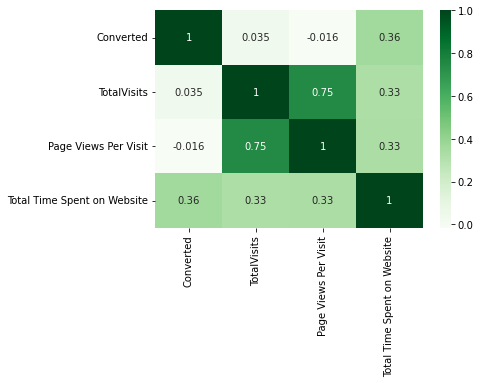

In [205]:
# Heatmap to show correlation between numerical variables
sns.heatmap(data=df_leads[num_cols].corr(),cmap="Greens",annot=True)
plt.show()

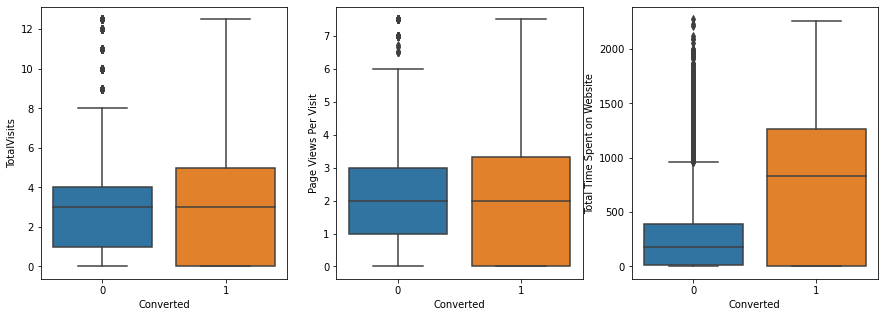

In [206]:
# Boxplot with Converted as hue

plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df_leads)
plt.subplot(1,3,2)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df_leads)
plt.subplot(1,3,3)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df_leads)
plt.show()

#### Past Leads who spends more time on Website are successfully converted than those who spends less as seen in the boxplot

## Data Preparation

### Dummy Variables
- For categorical variables with multiple levels, create dummy features (one-hot encoded)


In [207]:
df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Current_occupation,Free_copy
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,0


In [208]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(df_leads[["Lead Origin","Lead Source","Last Activity","Specialization","Current_occupation"]], drop_first=True)

# Adding the results to the master dataframe
df_leads = pd.concat([df_leads, dummy], axis=1)

In [209]:
df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Current_occupation,...,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current_occupation_Housewife,Current_occupation_NA,Current_occupation_Other,Current_occupation_Student,Current_occupation_Unemployed,Current_occupation_Working Professional
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,...,0,0,0,0,0,0,0,0,1,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,...,0,0,0,0,0,0,0,0,1,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,0,0,0,0,0,0,0,1,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,...,0,0,0,0,0,0,0,0,1,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,...,0,0,0,0,0,0,0,0,1,0


In [210]:
# Drop the columns for the created dummies

df_leads = df_leads.drop(["Lead Origin","Lead Source","Last Activity","Specialization","Current_occupation"],1)

In [211]:
df_leads.shape

(9240, 50)

In [212]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 50 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              9240 non-null   int64  
 1   Converted                                 9240 non-null   int64  
 2   TotalVisits                               9240 non-null   float64
 3   Total Time Spent on Website               9240 non-null   int64  
 4   Page Views Per Visit                      9240 non-null   float64
 5   Free_copy                                 9240 non-null   int64  
 6   Lead Origin_Landing Page Submission       9240 non-null   uint8  
 7   Lead Origin_Lead Add Form                 9240 non-null   uint8  
 8   Lead Origin_Lead Import                   9240 non-null   uint8  
 9   Lead Origin_Quick Add Form                9240 non-null   uint8  
 10  Lead Source_Facebook                

### Test-Train Split

In [213]:
# Putting predictor variables to X
X = df_leads.drop('Converted', axis=1)

# Putting Target variables to y
y = df_leads["Converted"]

In [214]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [215]:
print("X_train:", X_train.shape,"\ny_train:",y_train.shape)

X_train: (6468, 49) 
y_train: (6468,)


In [216]:
print("X_test:", X_test.shape,"\ny_test:",y_test.shape)

X_test: (2772, 49) 
y_test: (2772,)


### Feature Scaling

In [217]:
from sklearn.preprocessing import MinMaxScaler

In [218]:
#using MinMaxScaler
scaler = MinMaxScaler()

# fetching int64 and float64 dtype columns from dataframe for scaling
num_cols=X_train.select_dtypes(include=['int64','float64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [219]:
# X-train dataframe after standard scaling
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Free_copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,...,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current_occupation_Housewife,Current_occupation_NA,Current_occupation_Other,Current_occupation_Student,Current_occupation_Unemployed,Current_occupation_Working Professional
1871,0.0,0.00,0.000000,0.000000,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6795,0.0,0.32,0.214349,0.177333,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3516,0.0,0.40,0.046655,0.333333,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8105,0.0,0.40,0.541373,0.666667,0.0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3934,0.0,0.00,0.000000,0.000000,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [220]:
# Checking the Lead Conversion Rate (LCR) - "Converted" is our Target Variable
# We will denote Lead Conversion Rate with 'LCR' as its short form

LCR = (sum(df_leads['Converted'])/len(df_leads['Converted'].index))*100
LCR

38.53896103896104

#### Conversion Rate is 38.5%

### Looking at Correlations

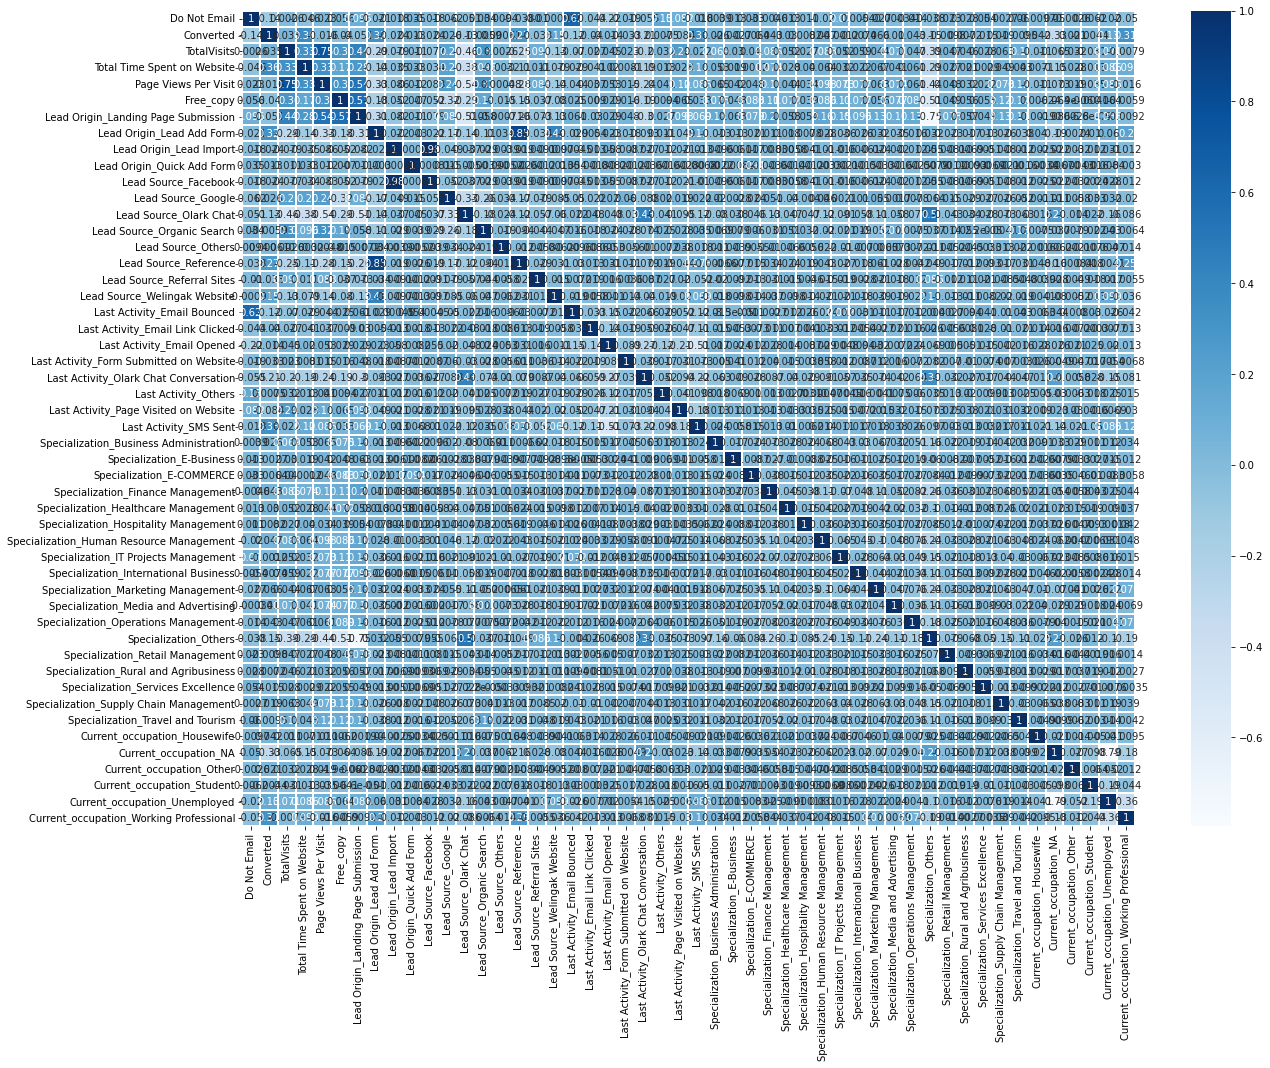

In [221]:
# analyse correlation matrix
plt.figure(figsize = (20,15))        
sns.heatmap(df_leads.corr(),linewidths=0.01,cmap="Blues",annot=True)
plt.show()

#### Drop Highly correlated columns

In [222]:
# Dropping correlated columns
X_test.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'] ,axis=1,inplace=True)
X_train.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],axis=1,inplace=True)

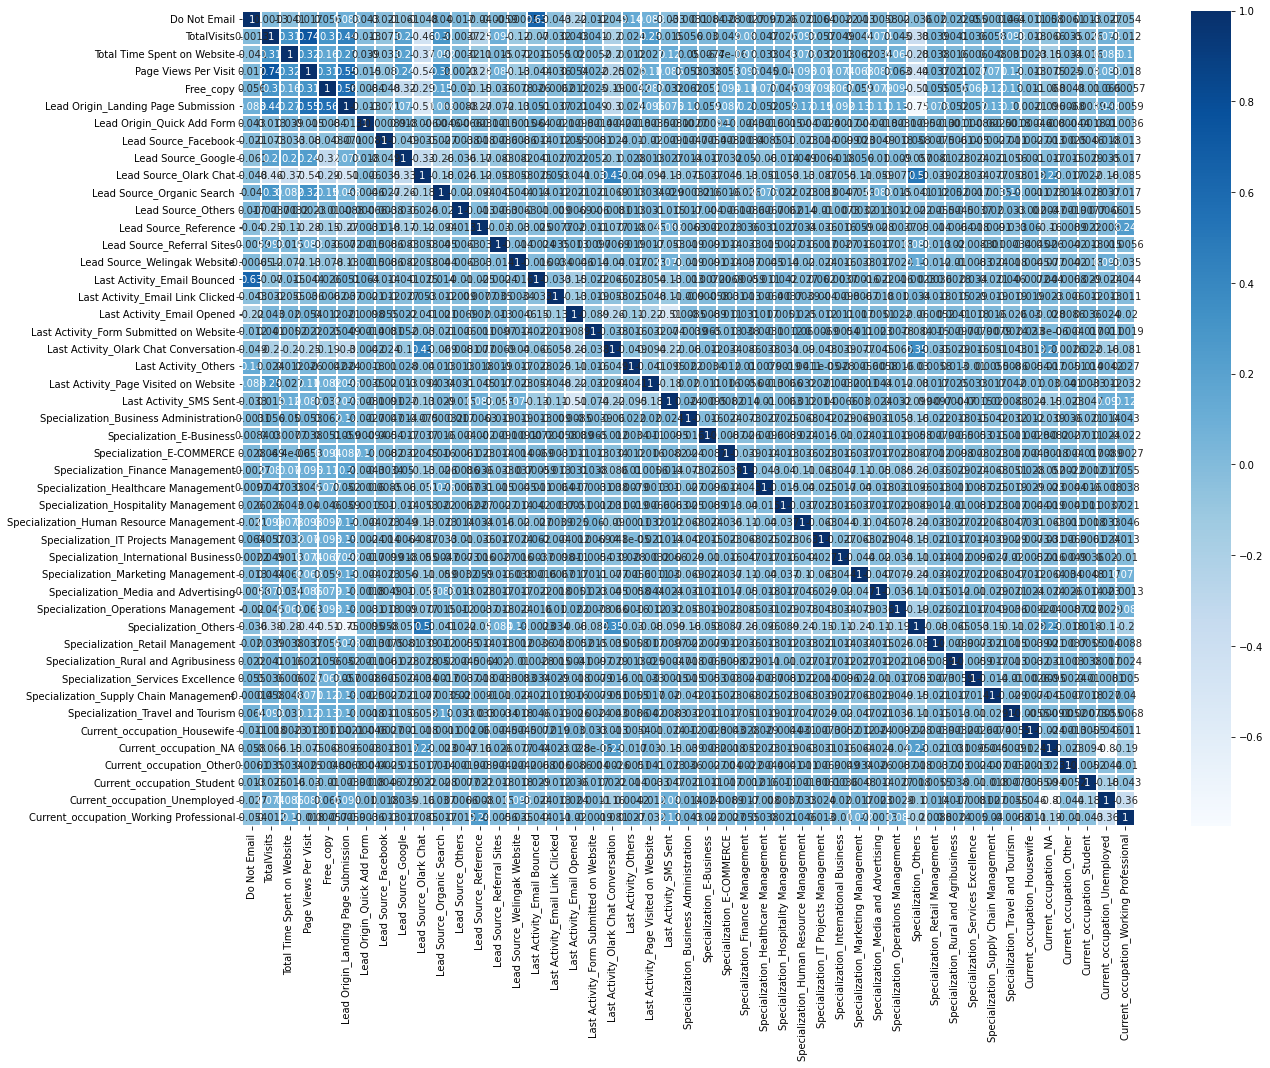

In [223]:
# analyse correlation matrix
plt.figure(figsize = (20,15))        
sns.heatmap(X_train.corr(),linewidths=0.01,cmap="Blues",annot=True)
plt.show()

## Model Building

### Feature Selection using RFE

In [224]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [225]:
from sklearn.feature_selection import RFE

In [226]:
# using RFE to reduce variables 
rfe = RFE(logreg, n_features_to_select=20)            


In [227]:
rfe = rfe.fit(X_train, y_train)

In [228]:
#checking the output of RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Free_copy', False, 4),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Quick Add Form', False, 15),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 16),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 27),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 25),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 20),
 ('Last Activity_Email Link Clicked', False, 5),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 21),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 9),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', False, 10),
 (

In [229]:
# Check the top 20 features chosen by RFE
top20=pd.DataFrame()
top20['features']=X_train.columns
top20['Feature Chosen'] = rfe.support_
top20['Ranking']=rfe.ranking_
top20.sort_values(by='Ranking')

,features,Feature Chosen,Ranking
0,Do Not Email,True,1
42,Current_occupation_NA,True,1
41,Current_occupation_Housewife,True,1
36,Specialization_Retail Management,True,1
35,Specialization_Others,True,1
28,Specialization_Hospitality Management,True,1
22,Last Activity_SMS Sent,True,1
20,Last Activity_Others,True,1
19,Last Activity_Olark Chat Conversation,True,1
17,Last Activity_Email Opened,True,1


In [230]:
# columns which are selected by RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Source_Facebook', 'Lead Source_Olark Chat', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'Specialization_Retail Management', 'Current_occupation_Housewife',
       'Current_occupation_NA', 'Current_occupation_Working Professional'],
      dtype='object')

In [231]:
# columns which are not selected by RFE
X_train.columns[~rfe.support_]

Index(['Free_copy', 'Lead Origin_Quick Add Form', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism', 'Current_occupatio

### Model 1

In [232]:
# User defined function for calculating VIFs for variables
def get_vif(model_df):
    X = pd.DataFrame()
    X['Features'] = model_df.columns
    X['VIF'] = [variance_inflation_factor(model_df.values, i) for i in range(model_df.shape[1])]
    X['VIF'] = round(X['VIF'], 2)
    X = X.sort_values(by='VIF', ascending=False)
    X = X.reset_index(drop=True)
    return X

In [233]:
# Building model using statsmodels, for the detailed statistics

# columns selected by RFE to be used for this model 
rfe_col=X_train.columns[rfe.support_]

# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm1 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm1 = sm.GLM(y_train,X_train_sm1,family = sm.families.Binomial()).fit()  

logm1.params

const                                      -1.753836
Do Not Email                               -1.034847
TotalVisits                                 1.450987
Total Time Spent on Website                 4.354554
Page Views Per Visit                       -1.253400
Lead Origin_Landing Page Submission        -1.072596
Lead Source_Facebook                       -0.732463
Lead Source_Olark Chat                      1.001620
Lead Source_Others                          1.229951
Lead Source_Reference                       2.714442
Lead Source_Welingak Website                5.140419
Last Activity_Email Opened                  0.821245
Last Activity_Olark Chat Conversation      -0.571614
Last Activity_Others                        1.442899
Last Activity_SMS Sent                      2.027255
Specialization_Hospitality Management      -0.956221
Specialization_Others                      -0.954851
Specialization_Retail Management           -0.428068
Current_occupation_Housewife               22.

In [234]:
#summary of our logistic regression model
print(logm1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2593.9
Date:                Tue, 16 Jan 2024   Deviance:                       5187.8
Time:                        16:38:51   Pearson chi2:                 7.39e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

"Current_occupation_Housewife" column will be removed from model due to high p-value of 0.999, which is above the accepted threshold of 0.05 for statistical significance.



### Model 2

In [235]:
# Dropping 'Current_occupation_Housewife' column
rfe_col=rfe_col.drop("Current_occupation_Housewife")

In [236]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm2 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm2 = sm.GLM(y_train,X_train_sm2,family = sm.families.Binomial()).fit()  

logm2.params

const                                     -1.737249
Do Not Email                              -1.040146
TotalVisits                                1.435992
Total Time Spent on Website                4.351006
Page Views Per Visit                      -1.255421
Lead Origin_Landing Page Submission       -1.067246
Lead Source_Facebook                      -0.738784
Lead Source_Olark Chat                     0.996477
Lead Source_Others                         1.221677
Lead Source_Reference                      2.728808
Lead Source_Welingak Website               5.134418
Last Activity_Email Opened                 0.818676
Last Activity_Olark Chat Conversation     -0.577157
Last Activity_Others                       1.433774
Last Activity_SMS Sent                     2.016393
Specialization_Hospitality Management     -0.963808
Specialization_Others                     -0.959638
Specialization_Retail Management          -0.435049
Current_occupation_NA                     -1.114381
Current_occu

In [237]:
# summary of our logistic regression model
print(logm2.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2600.7
Date:                Tue, 16 Jan 2024   Deviance:                       5201.5
Time:                        16:38:51   Pearson chi2:                 7.42e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

"Lead Source_Facebook" column will be removed from model due to high p-value of 0.160, which is above the accepted threshold of 0.05 for statistical significance.

### Model 3

In [238]:
# Dropping 'Lead Source_Facebook' column
rfe_col=rfe_col.drop("Lead Source_Facebook")

In [239]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm3 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm3 = sm.GLM(y_train,X_train_sm3,family = sm.families.Binomial()).fit()  

logm3.params

const                                     -1.771234
Do Not Email                              -1.039030
TotalVisits                                1.450234
Total Time Spent on Website                4.360815
Page Views Per Visit                      -1.227880
Lead Origin_Landing Page Submission       -1.049041
Lead Source_Olark Chat                     1.028605
Lead Source_Others                         1.235407
Lead Source_Reference                      2.765251
Lead Source_Welingak Website               5.166490
Last Activity_Email Opened                 0.811211
Last Activity_Olark Chat Conversation     -0.577795
Last Activity_Others                       1.432601
Last Activity_SMS Sent                     2.011821
Specialization_Hospitality Management     -0.977599
Specialization_Others                     -0.953450
Specialization_Retail Management          -0.434739
Current_occupation_NA                     -1.113732
Current_occupation_Working Professional    2.432041
dtype: float

In [240]:
# summary of our logistic regression model
print(logm3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2601.8
Date:                Tue, 16 Jan 2024   Deviance:                       5203.7
Time:                        16:38:52   Pearson chi2:                 7.42e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

"Specialization_Retail Management" column will be removed from model due to high p-value of 0.199, which is above the accepted threshold of 0.05 for statistical significance.

### Model 4

In [241]:
# Dropping 'Specialization_Retail Management' column
rfe_col=rfe_col.drop("Specialization_Retail Management")

In [242]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm4 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm4 = sm.GLM(y_train,X_train_sm4,family = sm.families.Binomial()).fit()  

logm4.params

const                                     -1.777030
Do Not Email                              -1.043448
TotalVisits                                1.451404
Total Time Spent on Website                4.354113
Page Views Per Visit                      -1.226071
Lead Origin_Landing Page Submission       -1.052316
Lead Source_Olark Chat                     1.026802
Lead Source_Others                         1.240878
Lead Source_Reference                      2.764867
Lead Source_Welingak Website               5.166681
Last Activity_Email Opened                 0.814293
Last Activity_Olark Chat Conversation     -0.573747
Last Activity_Others                       1.436813
Last Activity_SMS Sent                     2.013622
Specialization_Hospitality Management     -0.969838
Specialization_Others                     -0.948640
Current_occupation_NA                     -1.113082
Current_occupation_Working Professional    2.432462
dtype: float64

In [243]:
# summary of our logistic regression model
print(logm4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2602.7
Date:                Tue, 16 Jan 2024   Deviance:                       5205.3
Time:                        16:38:52   Pearson chi2:                 7.46e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

 "Lead Source_Others" column will be removed from model due to high p-value of 0.022, which is above the accepted threshold of 0.05 for statistical significance.

### Model 5

In [244]:
# Dropping 'Lead Source_Others' column
rfe_col=rfe_col.drop("Lead Source_Others")

In [245]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm5 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm5 = sm.GLM(y_train,X_train_sm5,family = sm.families.Binomial()).fit()  

logm5.params

const                                     -1.746788
Do Not Email                              -1.037852
TotalVisits                                1.439757
Total Time Spent on Website                4.342877
Page Views Per Visit                      -1.236643
Lead Origin_Landing Page Submission       -1.065235
Lead Source_Olark Chat                     1.007200
Lead Source_Reference                      2.741784
Lead Source_Welingak Website               5.149364
Last Activity_Email Opened                 0.814981
Last Activity_Olark Chat Conversation     -0.568289
Last Activity_Others                       1.437635
Last Activity_SMS Sent                     2.011296
Specialization_Hospitality Management     -0.974568
Specialization_Others                     -0.962177
Current_occupation_NA                     -1.110326
Current_occupation_Working Professional    2.425456
dtype: float64

In [246]:
# summary of our logistic regression model
print(logm5.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2605.2
Date:                Tue, 16 Jan 2024   Deviance:                       5210.4
Time:                        16:38:52   Pearson chi2:                 7.45e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

Model 5 is stable and has significant p-values within the threshold (p-values < 0.05), so we will use it for further analysis.

- Now lets check VIFs for these variables to check if there is any multicollinearity which exists among the independent variables

In [247]:
# Now checking VIFs for all variables in the Model 5
get_vif(X_train_rfe)

,Features,VIF
0,Page Views Per Visit,6.68
1,TotalVisits,4.77
2,Lead Origin_Landing Page Submission,4.18
3,Specialization_Others,2.95
4,Last Activity_Email Opened,2.86
5,Last Activity_SMS Sent,2.52
6,Lead Source_Olark Chat,2.33
7,Total Time Spent on Website,2.13
8,Last Activity_Olark Chat Conversation,1.83
9,Current_occupation_NA,1.61


"Page Views Per Visit" needs to be dropped as VIF > 5

### Model 6

In [248]:
# Dropping 'Page Views Per Visit' column
rfe_col=rfe_col.drop("Page Views Per Visit")

In [249]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm6 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm6 = sm.GLM(y_train,X_train_sm6,family = sm.families.Binomial()).fit()  

logm6.params

const                                     -1.905815
Do Not Email                              -1.046776
TotalVisits                                0.788952
Total Time Spent on Website                4.311149
Lead Origin_Landing Page Submission       -1.130747
Lead Source_Olark Chat                     1.202093
Lead Source_Reference                      2.956302
Lead Source_Welingak Website               5.339946
Last Activity_Email Opened                 0.741113
Last Activity_Olark Chat Conversation     -0.624801
Last Activity_Others                       1.363945
Last Activity_SMS Sent                     1.910817
Specialization_Hospitality Management     -0.999140
Specialization_Others                     -0.926315
Current_occupation_NA                     -1.109410
Current_occupation_Working Professional    2.415148
dtype: float64

In [250]:
# Now checking VIFs for all variables in the Model 6
get_vif(X_train_rfe)

,Features,VIF
0,Lead Origin_Landing Page Submission,3.80
1,Specialization_Others,2.92
2,TotalVisits,2.89
3,Last Activity_Email Opened,2.73
4,Last Activity_SMS Sent,2.39
5,Lead Source_Olark Chat,2.21
6,Total Time Spent on Website,2.12
7,Last Activity_Olark Chat Conversation,1.81
8,Current_occupation_NA,1.61
9,Lead Source_Reference,1.31


As VIF values are < 5, Model 6 is used for Evaluation

### Model Evaluation

- Confusion Matrix
- Accuracy
- Sensitivity and Specificity
- Threshold determination using ROC & Finding Optimal cutoff point
- Precision and Recall

In [251]:
# Getting the predicted values on the train set
y_train_pred = logm6.predict(X_train_sm6)           # giving prob. of getting 1

y_train_pred[:10]

1871    0.509347
6795    0.114537
3516    0.408008
8105    0.821094
3934    0.291332
4844    0.987775
3297    0.155467
8071    0.995834
987     0.088511
7423    0.903248
dtype: float64

In [252]:
# for array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.50934683, 0.11453723, 0.40800799, 0.82109392, 0.29133205,
       0.98777451, 0.15546742, 0.99583403, 0.08851113, 0.90324815])

In [253]:
# Creating a dataframe with the actual churn flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

# y_train.values actual Converted values from df_leads dataset
# y_train_pred probability of Converted values predicted by model

,Converted,Converted_Prob,Prospect ID
0,0,0.509347,1871
1,0,0.114537,6795
2,0,0.408008,3516
3,0,0.821094,8105
4,0,0.291332,3934


 Now we have to find the optimal cutoff Threshold value of Probability. Let's start with default 0.5 value and add a new feature predicted in above dataframe using the probabilities

In [254]:
y_train_pred_final['Predicted'] = y_train_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.5 else 0)

# checking head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted
0,0,0.509347,1871,1
1,0,0.114537,6795,0
2,0,0.408008,3516,0
3,0,0.821094,8105,1
4,0,0.291332,3934,0


In [255]:
# Confusion matrix  (Actual / predicted)

confusion = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])
print(confusion)

[[3549  453]
 [ 733 1733]]


In [256]:
# Predicted        not_converted  |  converted
# Actual                          |
# -----------------------------------------------------
# not_converted       3549       |   453
# converted           733        |   1733  


# Above is the confusion matrix when we use threshold of probability as 0.5

In [257]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["Predicted"]))

0.8166357452071737


### Metrics beyond simply accuracy

- Sensitivity and Specificity
- When we have Predicted at threshold 0.5 probability

In [258]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [259]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.702757502027575


In [260]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8868065967016492


In [261]:
# Calculate false postive rate - predicting conversion when customer does not have converted
print(FP/ float(TN+FP))

0.11319340329835083


In [262]:
# positive predictive value 
print (TP / float(TP+FP))

0.792772186642269


In [263]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8288183092013078


### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [264]:
# UDF to draw ROC curve 
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [265]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

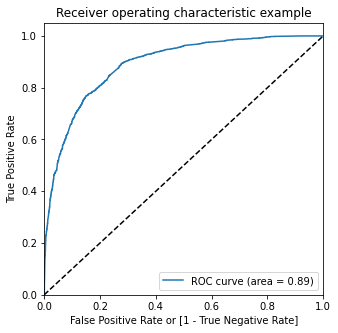

In [266]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

Area under ROC curve is 0.89 out of 1 which indicates a good predictive model

In [267]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.509347,1871,1,1,1,1,1,1,1,0,0,0,0
1,0,0.114537,6795,0,1,1,0,0,0,0,0,0,0,0
2,0,0.408008,3516,0,1,1,1,1,1,0,0,0,0,0
3,0,0.821094,8105,1,1,1,1,1,1,1,1,1,1,0
4,0,0.291332,3934,0,1,1,1,0,0,0,0,0,0,0


In [268]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.628633  0.975669  0.414793
0.2   0.2  0.758503  0.918897  0.659670
0.3   0.3  0.797464  0.844282  0.768616
0.4   0.4  0.816481  0.776156  0.841329
0.5   0.5  0.816636  0.702758  0.886807
0.6   0.6  0.802257  0.608273  0.921789
0.7   0.7  0.787724  0.528792  0.947276
0.8   0.8  0.762059  0.426196  0.969015
0.9   0.9  0.713358  0.266829  0.988506


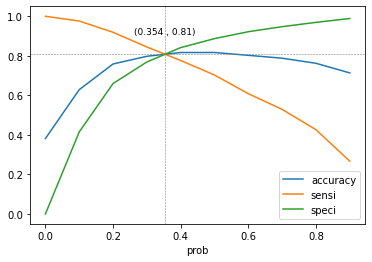

In [269]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

from scipy.interpolate import interp1d
from scipy.optimize import fsolve

# Finding the intersection points of the sensitivity and accuracy curves
sensi_interp = interp1d(cutoff_df['prob'], cutoff_df['sensi'], kind='linear')
acc_interp = interp1d(cutoff_df['prob'], cutoff_df['accuracy'], kind='linear')
intersection_1 = np.round(float(fsolve(lambda x : sensi_interp(x) - acc_interp(x), 0.5)), 3)

# Find the intersection points of the specificity and accuracy curves
speci_interp = interp1d(cutoff_df['prob'], cutoff_df['speci'], kind='linear')
intersection_2 = np.round(float(fsolve(lambda x : speci_interp(x) - acc_interp(x), 0.5)), 3)

# Calculate the average of the two intersection points
intersection_x = (intersection_1 + intersection_2) / 2

# Interpolate the accuracy, sensitivity, and specificity at the intersection point
accuracy_at_intersection = np.round(float(acc_interp(intersection_x)), 2)
sensitivity_at_intersection = np.round(float(sensi_interp(intersection_x)), 2)
specificity_at_intersection = np.round(float(speci_interp(intersection_x)), 2)

# Plot the three curves and add vertical and horizontal lines at intersection point
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
plt.axvline(x=intersection_x, color='grey',linewidth=0.55, linestyle='--')
plt.axhline(y=accuracy_at_intersection, color='grey',linewidth=0.55, linestyle='--')

# Adding annotation to display the (x,y) intersection point coordinates 
plt.annotate(f'({intersection_x} , {accuracy_at_intersection})',
             xy=(intersection_x, accuracy_at_intersection),
             xytext=(0,20),
             textcoords='offset points',
             ha='center',
             fontsize=9)

# Displaying the plot
plt.show()

0.354 is the approx. point where all the curves meet, so 0.354 seems to be our Optimal cutoff point for probability threshold .

Lets do mapping again using optimal cutoff point


In [270]:
y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.345 else 0)

# deleting the unwanted columns from dataframe
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,"Predicted"],axis = 1, inplace = True) 
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,final_predicted
0,0,0.509347,1871,1
1,0,0.114537,6795,0
2,0,0.408008,3516,1
3,0,0.821094,8105,1
4,0,0.291332,3934,0


In [271]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"]))

# or can be found using confusion matrix with formula, lets find all matrix in one go ahead using UDF

0.8039579468150897


In [272]:
# UDF for all Logistic Regression Metrics
def logreg_all_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]
    
    accuracy = (TN+TP)/(TN+TP+FN+FP)
    sensi = TP/(TP+FN)
    speci = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)
    
    #Calculate false postive rate - predicting conversion when customer does not have converted
    FPR = FP/(FP + TN)     
    FNR = FN/(FN +TP)
    
    print ("True Negative                    : ", TN)
    print ("True Positive                    : ", TP)
    print ("False Negative                   : ", FN)
    print ("False Positve                    : ", FP) 
    
    print ("Model Accuracy                   : ", round(accuracy,4))
    print ("Model Sensitivity                : ", round(sensi,4))
    print ("Model Specificity                : ", round(speci,4))
    print ("Model Precision                  : ", round(precision,4))
    print ("Model Recall                     : ", round(recall,4))
    print ("Model True Positive Rate (TPR)   : ", round(TPR,4))
    print ("Model False Positive Rate (FPR)  : ", round(FPR,4))
    

In [273]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[3222  780]
 [ 488 1978]] 

************************************************** 

True Negative                    :  3222
True Positive                    :  1978
False Negative                   :  488
False Positve                    :  780
Model Accuracy                   :  0.804
Model Sensitivity                :  0.8021
Model Specificity                :  0.8051
Model Precision                  :  0.7172
Model Recall                     :  0.8021
Model True Positive Rate (TPR)   :  0.8021
Model False Positive Rate (FPR)  :  0.1949


************************************************** 



- Accuracy                   :  80.4%
- Sensitivity                :  80.21%
- Specificity                :  80.51%

### Precision and recall tradeoff
Let's compare all metrics of Precision-Recall view with Specificity-Sensivity view and get better probability threshold for boosting conversion rate to 80% as asked by CEO.

In [274]:
# Creating precision-recall tradeoff curve
y_train_pred_final['Converted'], y_train_pred_final['final_predicted']
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])


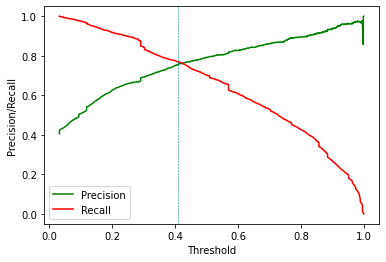

In [275]:
# plot precision-recall tradeoff curve
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")

# add legend and axis labels

plt.axvline(x=0.41, color='teal',linewidth = 0.55, linestyle='--')
plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')

plt.show()

The intersection point of the curve is the threshold value where the model achieves a balance between precision and recall. It can be used to optimise the performance of the model based on business requirement,Here our probability threshold is 0.41 aprrox from above curve

In [276]:
# copying df to test model evaluation with precision recall threshold of 0.41
y_train_precision_recall = y_train_pred_final.copy()

In [277]:
# assigning a feature for 0.41 cutoff from precision recall curve to see which one is best view (sensi-speci or precision-recall)
y_train_precision_recall['precision_recall_prediction'] = y_train_precision_recall['Converted_Prob'].map( lambda x: 1 if x > 0.41 else 0)
y_train_precision_recall.head()

,Converted,Converted_Prob,Prospect ID,final_predicted,precision_recall_prediction
0,0,0.509347,1871,1,1
1,0,0.114537,6795,0,0
2,0,0.408008,3516,1,0
3,0,0.821094,8105,1,1
4,0,0.291332,3934,0,0


In [278]:
## Lets see all matrics at 0.41 cutoff in precision-recall view and compare it with 0.345 cutoff from sensi-speci view

# Finding Confusion metrics for 'y_train_precision_recall' df
confusion_matrix = metrics.confusion_matrix(y_train_precision_recall['Converted'], y_train_precision_recall['precision_recall_prediction'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[3393  609]
 [ 569 1897]] 

************************************************** 

True Negative                    :  3393
True Positive                    :  1897
False Negative                   :  569
False Positve                    :  609
Model Accuracy                   :  0.8179
Model Sensitivity                :  0.7693
Model Specificity                :  0.8478
Model Precision                  :  0.757
Model Recall                     :  0.7693
Model True Positive Rate (TPR)   :  0.7693
Model False Positive Rate (FPR)  :  0.1522


************************************************** 



- As we can see in above metrics when we used precision-recall threshold cut-off of 0.41 the values in True Positive Rate ,Sensitivity, Recall have dropped to around 76%, but we need it close to 80% as the Business Objective.
- 80% for the metrics we are getting with the sensitivity-specificity cut-off threshold of 0.354. So, we will go with sensitivity-specificity view for our Optimal cut-off for final predictions.

### Adding Lead Score Feature to Training dataframe

- A higher score would mean that the lead is hot, i.e. is most likely to convert
- Whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [279]:
# Lets add Lead Score 

y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,final_predicted,Lead_Score
0,0,0.509347,1871,1,51
1,0,0.114537,6795,0,11
2,0,0.408008,3516,1,41
3,0,0.821094,8105,1,82
4,0,0.291332,3934,0,29


### Making Predictions on Test Set

In [280]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2772 entries, 4269 to 2960
Data columns (total 47 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              2772 non-null   int64  
 1   TotalVisits                               2772 non-null   float64
 2   Total Time Spent on Website               2772 non-null   int64  
 3   Page Views Per Visit                      2772 non-null   float64
 4   Free_copy                                 2772 non-null   int64  
 5   Lead Origin_Landing Page Submission       2772 non-null   uint8  
 6   Lead Origin_Quick Add Form                2772 non-null   uint8  
 7   Lead Source_Facebook                      2772 non-null   uint8  
 8   Lead Source_Google                        2772 non-null   uint8  
 9   Lead Source_Olark Chat                    2772 non-null   uint8  
 10  Lead Source_Organic Search       

In [281]:
# fetching int64 and float64 dtype columns from dataframe for scaling
num_cols=X_test.select_dtypes(include=['int64','float64']).columns

# scaling columns
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_test = X_test[rfe_col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Specialization_Hospitality Management,Specialization_Others,Current_occupation_NA,Current_occupation_Working Professional
4269,0.0,0.64,0.444982,0,0,0,0,0,0,0,1,0,1,1,0
2376,0.0,0.00,0.000000,0,0,1,0,0,0,0,1,0,1,0,0
7766,0.0,0.40,0.025968,0,0,0,0,0,0,1,0,0,0,0,1
9199,0.0,0.00,0.000000,0,1,0,0,0,1,0,0,0,1,0,0
4359,0.0,0.00,0.000000,0,0,1,0,1,0,0,0,0,0,0,0


### Prediction on Test Dataset using final model

In [282]:
# Adding contant value
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(2772, 16)

In [283]:
# making prediction using model 6 (final model)
y_test_pred = logm6.predict(X_test_sm)

In [284]:
# top 10 columns
y_test_pred[:10]

4269    0.596906
2376    0.884422
7766    0.908944
9199    0.094933
4359    0.857123
9186    0.602102
1631    0.485582
8963    0.198908
8007    0.035438
5324    0.346877
dtype: float64

In [285]:
# Changing to dataframe of predicted probability
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

,0
4269,0.596906
2376,0.884422
7766,0.908944
9199,0.094933
4359,0.857123


In [286]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1


In [287]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_test_pred
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.596906
1,1,2376,0.884422
2,1,7766,0.908944
3,0,9199,0.094933
4,1,4359,0.857123


In [288]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,4269,1,0.596906
1,2376,1,0.884422
2,7766,1,0.908944
3,9199,0,0.094933
4,4359,1,0.857123


In [289]:
# taking sensitivity-specificity method at 0.345 probability cutoff during training
y_pred_final['final_predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.345 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,4269,1,0.596906,1
1,2376,1,0.884422,1
2,7766,1,0.908944,1
3,9199,0,0.094933,0
4,4359,1,0.857123,1


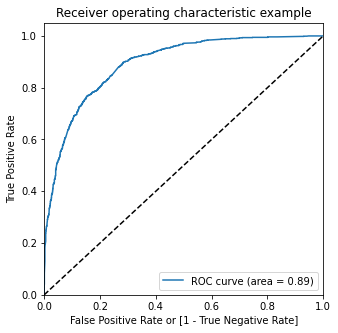

In [290]:
# Drawing ROC curve for Test Set
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final["Converted"], y_pred_final["Converted_Prob"], drop_intermediate = False )

draw_roc(y_pred_final["Converted"], y_pred_final["Converted_Prob"])

#### Area under ROC curve is 0.89 out of 1 which indicates a good predictive model

- Now that the final predictions have been made, the next step would be to evaluate the performance of the predictive model on a test set.
- We will do this by comparing the predicted labels (final_predicted) to the actual labels (Converted) to compute various performance metrics such as accuracy, precision, recall, etc.

## Test set Model Evaluation

Calculating all metrics using confusion matrix for Test set

In [291]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['final_predicted'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")


************************************************** 

Confusion Matrix
[[1344  333]
 [ 218  877]] 

************************************************** 

True Negative                    :  1344
True Positive                    :  877
False Negative                   :  218
False Positve                    :  333
Model Accuracy                   :  0.8012
Model Sensitivity                :  0.8009
Model Specificity                :  0.8014
Model Precision                  :  0.7248
Model Recall                     :  0.8009
Model True Positive Rate (TPR)   :  0.8009
Model False Positive Rate (FPR)  :  0.1986


************************************************** 



The evaluation matrics are pretty close to each other so it indicates that the model is performing consistently across different evaluation metrics in both test and train dataset.

For Test set
- Accuracy : 80.12%
- Sensitivity : 80.09% ≈ 80%
- Specificity : 80.14%
These matrics are very close to train set, so out final model logm6 is performing with good consistency on both Train & Test set

In [294]:
# features and their coefficicent from final model
parameters=logm6.params.sort_values(ascending=False)
parameters

Lead Source_Welingak Website               5.339946
Total Time Spent on Website                4.311149
Lead Source_Reference                      2.956302
Current_occupation_Working Professional    2.415148
Last Activity_SMS Sent                     1.910817
Last Activity_Others                       1.363945
Lead Source_Olark Chat                     1.202093
TotalVisits                                0.788952
Last Activity_Email Opened                 0.741113
Last Activity_Olark Chat Conversation     -0.624801
Specialization_Others                     -0.926315
Specialization_Hospitality Management     -0.999140
Do Not Email                              -1.046776
Current_occupation_NA                     -1.109410
Lead Origin_Landing Page Submission       -1.130747
const                                     -1.905815
dtype: float64

A high positive coefficient indicates that a variable has a stronger influence on predicting the probability of leads converting to take up X-Education's course.

In [293]:
# adding Lead Score 

y_pred_final['Lead_Score'] = y_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead_Score
0,4269,1,0.596906,1,60
1,2376,1,0.884422,1,88
2,7766,1,0.908944,1,91
3,9199,0,0.094933,0,9
4,4359,1,0.857123,1,86


"Lead Score" is assigned to the customers

The customers with a higher lead score have a higher conversion chance
The customers with a lower lead score have a lower conversion chance.

Train set 
- Accuracy : 80.4%
- Sensitivity : 80.21%
- Specificity : 80.51%

Test set
- Accuracy : 80.12%
- Sensitivity : 80.09% ≈ 80%
- Specificity : 80.14% 